In [79]:
import pandas as pd
import os
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [80]:
cwd = os.getcwd()

In [81]:
cwd

'/media/tanisha/f3ce507f-57f8-4bdb-b6eb-ccd3ee398291/GDG Talk/Dataset'

In [82]:
os.listdir(cwd)

['customer churn',
 '.ipynb_checkpoints',
 'iris',
 '.idea',
 'first order theorem prover',
 'Data Visualization.ipynb',
 'happiness_survey',
 'bankruptcy',
 'Untitled.ipynb',
 "parkinson's disease"]

In [83]:
cc_file_path = os.path.join(cwd, 'customer churn', 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [84]:
df = pd.read_csv(cc_file_path)

In [85]:
df.columns

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')

In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('----------------------------------------------_')

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------_
gender
['Female' 'Male']
----------------------------------------------_
SeniorCitizen
[0 1]
----------------------------------------------_
Partner
['Yes' 'No']
----------------------------------------------_
Dependents
['No' 'Yes']
----------------------------------------------_
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------------_
PhoneService
['No' 'Yes']
----------------------------------------------_
MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------------_
InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------------_
OnlineSecurity
['No' 'Yes' 'No inter

In [88]:
def convert_feature_to_binary(col_name, values):
    if len(values.keys()) != 2:
        raise Exception('length should be 2')
    df['binary_'+col_name] = df[col_name].apply(lambda x: values[x])
#     df.drop(col_name, axis=1, inplace=True)

In [89]:
convert_feature_to_binary('gender', {'Female': 1, 'Male': 0})
convert_feature_to_binary('Partner', {'Yes': 1, 'No': 0})
convert_feature_to_binary('Dependents', {'Yes': 1, 'No': 0})
convert_feature_to_binary('PhoneService', {'Yes': 1, 'No': 0})
convert_feature_to_binary('PaperlessBilling', {'Yes': 1, 'No': 0})
convert_feature_to_binary('Churn', {'Yes': 1, 'No': 0})

In [90]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('-------------------------------------------------------')

customerID
5199-FPUSP    1
3696-XRIEN    1
2788-CJQAQ    1
0330-IVZHA    1
8631-XVRZL    1
8234-GSZYK    1
1501-SGHBW    1
6542-LWGXJ    1
4349-GFQHK    1
6103-QCKFX    1
9965-YOKZB    1
9027-YFHQJ    1
6297-NOOPG    1
3097-IDVPU    1
7989-VCQOH    1
2091-MJTFX    1
9924-JPRMC    1
8404-VIOMB    1
6633-MPWBS    1
5039-LZRQT    1
0975-VOOVL    1
6362-QHAFM    1
0945-TSONX    1
2077-DDHJK    1
5384-ZTTWP    1
2868-LLSKM    1
2525-GVKQU    1
0280-XJGEX    1
4891-NLUBA    1
7470-DYNOE    1
             ..
7980-MHFLQ    1
3908-BLSYF    1
7404-JLKQG    1
1810-BOHSY    1
8189-XRIKE    1
3533-UVMOM    1
8107-RZLNV    1
0603-TPMIB    1
2933-XEUJM    1
0334-GDDSO    1
9867-XOBQA    1
4718-DHSMV    1
9927-DSWDF    1
2642-MAWLJ    1
9691-HKOVS    1
2000-DHJUY    1
9633-DENPU    1
3774-VBNXY    1
7785-RDVIG    1
3709-OIJEA    1
4412-YLTKF    1
5203-XEHAX    1
4013-TLDHQ    1
8212-DJRCH    1
5857-XRECV    1
8107-KNCIM    1
1337-BOZWO    1
0665-XHDJU    1
3798-EPWRR    1
0530-IJVDB    1
Name: custome

In [91]:
df['binary_Churn'].value_counts()/df.shape[0]*100

0    73.463013
1    26.536987
Name: binary_Churn, dtype: float64

In [92]:
df_corr = df.corr()

In [93]:
df_corr['binary_Churn']

SeniorCitizen              0.150889
tenure                    -0.352229
MonthlyCharges             0.193356
binary_gender              0.008612
binary_Partner            -0.150448
binary_Dependents         -0.164221
binary_PhoneService        0.011942
binary_PaperlessBilling    0.191825
binary_Churn               1.000000
Name: binary_Churn, dtype: float64

In [94]:
df['Partner'].value_counts().to_dict()

{'No': 3641, 'Yes': 3402}

<BarContainer object of 2 artists>

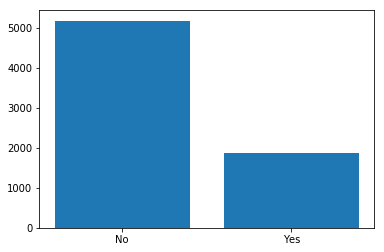

In [95]:
gender_vc = df['Churn'].value_counts()
plt.bar(gender_vc.index, gender_vc.values)

In [96]:
df.columns

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn',
       u'binary_gender', u'binary_Partner', u'binary_Dependents',
       u'binary_PhoneService', u'binary_PaperlessBilling', u'binary_Churn'],
      dtype='object')

In [97]:
col_drop = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']

In [98]:
df.drop(col_drop, axis=1, inplace=True)

In [99]:
df.columns

Index([u'customerID', u'SeniorCitizen', u'tenure', u'MultipleLines',
       u'InternetService', u'OnlineSecurity', u'OnlineBackup',
       u'DeviceProtection', u'TechSupport', u'StreamingTV', u'StreamingMovies',
       u'Contract', u'PaymentMethod', u'MonthlyCharges', u'TotalCharges',
       u'binary_gender', u'binary_Partner', u'binary_Dependents',
       u'binary_PhoneService', u'binary_PaperlessBilling', u'binary_Churn'],
      dtype='object')

In [100]:
df.dtypes

customerID                  object
SeniorCitizen                int64
tenure                       int64
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
binary_gender                int64
binary_Partner               int64
binary_Dependents            int64
binary_PhoneService          int64
binary_PaperlessBilling      int64
binary_Churn                 int64
dtype: object

In [101]:
df['TotalCharges'] = df['TotalCharges'].str.replace('\s+', '0.0')
df['TotalCharges'] = df['TotalCharges'].astype('float64')
# for tc in df['TotalCharges'].unique().tolist():
#     try:
#         eval(tc)
#     except Exception as e:
#         print(tc)

In [102]:
df.dtypes

customerID                  object
SeniorCitizen                int64
tenure                       int64
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
binary_gender                int64
binary_Partner               int64
binary_Dependents            int64
binary_PhoneService          int64
binary_PaperlessBilling      int64
binary_Churn                 int64
dtype: object

In [103]:
sub_df = df.drop('customerID', axis=1)

In [104]:
sub_df.shape

(7043, 20)

In [105]:
features = pd.get_dummies(sub_df)

In [106]:
features.shape

(7043, 41)

In [107]:
features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,binary_gender,binary_Partner,binary_Dependents,binary_PhoneService,binary_PaperlessBilling,binary_Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
5,0,8,99.65,820.50,1,0,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
6,0,22,89.10,1949.40,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0
7,0,10,29.75,301.90,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
8,0,28,104.80,3046.05,1,1,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
9,0,62,56.15,3487.95,0,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [108]:
feature_corr = features.corr()

In [109]:
feature_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,binary_gender,binary_Partner,binary_Dependents,binary_PhoneService,binary_PaperlessBilling,binary_Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889,...,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.014569,0.096848,-0.113890,0.247398,0.352150,0.193356,...,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.000080,0.317504,0.062078,0.113214,0.158574,-0.198324,...,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,0.185987,0.182915,-0.059246,-0.295758
binary_gender,0.001874,-0.005106,0.014569,0.000080,1.000000,0.001808,-0.010517,0.006488,0.011754,0.008612,...,-0.005374,-0.006026,0.010487,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744
binary_Partner,0.016479,0.379697,0.096848,0.317504,0.001808,1.000000,0.452676,0.017706,-0.014877,-0.150448,...,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
binary_Dependents,-0.211185,0.159712,-0.113890,0.062078,-0.010517,0.452676,1.000000,-0.001762,-0.111377,-0.164221,...,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
binary_PhoneService,0.008576,0.008448,0.247398,0.113214,0.006488,0.017706,-0.001762,1.000000,0.016505,0.011942,...,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
binary_PaperlessBilling,0.156530,0.006152,0.352150,0.158574,0.011754,-0.014877,-0.111377,0.016505,1.000000,0.191825,...,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
binary_Churn,0.150889,-0.352229,0.193356,-0.198324,0.008612,-0.150448,-0.164221,0.011942,0.191825,1.000000,...,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683


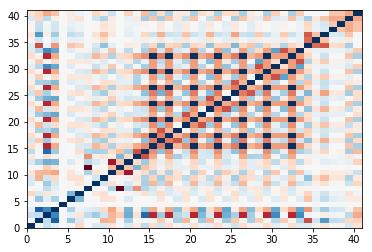

In [110]:
plt.pcolormesh(feature_corr, cmap='RdBu')

In [111]:
features.to_csv(os.path.join(cwd, 'customer churn', 'features.csv'))

In [71]:
sub_df.shape

(41, 41)

In [72]:
df.shape

(7043, 21)